In [133]:
pip install ggplot

     |████████████████████████████████| 2.2MB 1.4MB/s eta 0:00:01     |███▎                            | 225kB 1.4MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install tslib

Note: you may need to restart the kernel to use updated packages.


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
# import ggplot

In [12]:
df = pd.read_csv("credit card default.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [18]:
df.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [23]:
df_1 = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first = True)

In [24]:
df_1.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,0,0,0,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,1,0,1,0,0,0,0,0,1,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1,0,1,0,0,0,0,0,1,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1,0,1,0,0,0,0,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,0,0,1,0,0,0,0,1,0,0


In [28]:
X = df_1.drop(['default payment next month', 'ID'], axis=1)
y = df_1['default payment next month'].values.reshape(-1,1)

In [29]:
X.columns


Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [31]:
y

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [34]:
log_reg = LogisticRegression()

In [35]:
model = log_reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
original_variables = X_train.columns

In [40]:
model_coefficients = model.coef_[0]

In [42]:
coefficient_df = pd.DataFrame({"Variable": original_variables, "Coefficient": model_coefficients})
coefficient_df

,Variable,Coefficient
0,LIMIT_BAL,-5.434222e-06
1,AGE,-7.649645e-06
2,PAY_0,5.723041e-07
3,PAY_2,4.489123e-07
4,PAY_3,3.930121e-07
5,PAY_4,3.760470e-07
6,PAY_5,3.474983e-07
7,PAY_6,3.268860e-07
8,BILL_AMT1,-1.049684e-05
9,BILL_AMT2,5.621008e-06


In [44]:
top_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:10]
top_df

,Variable,Coefficient
9,BILL_AMT2,5.621008e-06
12,BILL_AMT5,4.661604e-06
10,BILL_AMT3,2.123811e-06
13,BILL_AMT6,1.759410e-06
2,PAY_0,5.723041e-07
3,PAY_2,4.489123e-07
4,PAY_3,3.930121e-07
5,PAY_4,3.760470e-07
6,PAY_5,3.474983e-07
7,PAY_6,3.268860e-07


In [45]:
rf = RandomForestClassifier()

In [46]:
rf_clf = rf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [47]:
choosen_tree = rf_clf.estimators_[6]
choosen_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2040995054, splitter='best')

In [49]:
# Extract the parameters and features at the top node
split_column = choosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = choosen_tree.tree_.threshold[0]

In [50]:
print("This tree splits on feature {} and a value at {}".format(split_column_name, split_value))

This tree splits on feature EDUCATION_2 and a value at 0.5


In [53]:
pred = rf_clf.predict(X_test)

In [54]:
accuracy_score(y_test, pred)

0.8153333333333334

In [59]:
confusion_matrix(y_test, pred)

array([[4417,  270],
       [ 838,  475]])

In [68]:
print("Classification Report: \n {}"  .format(classification_report(y_test, pred)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [79]:
rf_new = RandomForestClassifier(n_estimators=500)
rf_new.fit(X_train, y_train)
y_pred = rf_new.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [80]:
print("Accuracy Score: \n {}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report: \n {}"  .format(classification_report(y_test, y_pred)))

Accuracy Score: 
 0.8175
Confusion Matrix: 
 [[4420  267]
 [ 828  485]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [83]:
# Using KNN

In [87]:
neighbors = [5,10,20,30]
accuracy_list = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    accuracy_list.append(knn_accuracy)
results_df = pd.DataFrame({'Neighbors':neighbors, 'Accuracy': accuracy_list})
results_df
    


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


,Neighbors,Accuracy
0,5,0.755833
1,10,0.776333
2,20,0.779833
3,30,0.780833


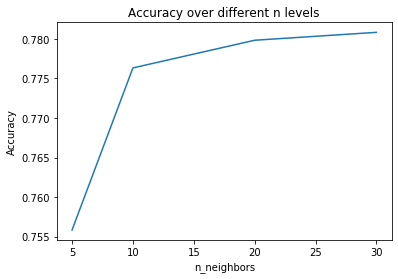

In [89]:
plt.plot(results_df['Neighbors'], results_df['Accuracy'])
plt.gca().set(xlabel='n_neighbors', ylabel='Accuracy', title='Accuracy over different n levels')

plt.show()

In [91]:
# Gradient Boosting Classifier

In [93]:
learning_rates = np.linspace(0.01, 2, num=30)
accuracy = []

for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate = learning_rate)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
    


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

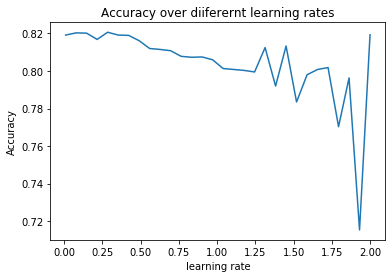

In [95]:
plt.plot(learning_rates, accuracy)
plt.gca().set(xlabel='learning rate', ylabel='Accuracy', title = 'Accuracy over diiferernt learning rates')
plt.show()

In [97]:
rf_class = RandomForestClassifier(criterion='entropy')

In [98]:
param_grid = {'max_depth':[2,4,8,15], 'max_features':['auto', 'sqrt']}

In [99]:
grid_rf_class = GridSearchCV(estimator=rf_class, param_grid = param_grid, scoring='roc_auc', cv=5, refit=True,
                            return_train_score =True)
print(grid_rf_class)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
  

In [100]:
grid_rf_class.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
  

In [101]:
best_score = grid_rf_class.best_score_
best_n_estimators = grid_rf_class.best_params_
print(best_score)
print(best_n_estimators)

0.7808365487145711
{'max_depth': 8, 'max_features': 'sqrt'}


In [103]:
cv_results = pd.DataFrame(grid_rf_class.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.950177,0.072395,0.028150,0.003253,2,auto,"{'max_depth': 2, 'max_features': 'auto'}",0.769712,0.771836,0.775758,...,0.767586,0.006313,8,0.770556,0.767234,0.770935,0.770780,0.773273,0.770556,0.001929
1,1.032222,0.121756,0.029233,0.004284,2,sqrt,"{'max_depth': 2, 'max_features': 'sqrt'}",0.770601,0.775649,0.772315,...,0.768319,0.006165,7,0.768558,0.768748,0.769187,0.772231,0.773310,0.770407,0.001970
2,1.706807,0.180479,0.040531,0.009448,4,auto,"{'max_depth': 4, 'max_features': 'auto'}",0.775383,0.778954,0.781731,...,0.773057,0.007386,6,0.777528,0.777437,0.778701,0.780165,0.781133,0.778993,0.001456
3,1.584081,0.031744,0.036789,0.002982,4,sqrt,"{'max_depth': 4, 'max_features': 'sqrt'}",0.776574,0.778136,0.779770,...,0.773165,0.006409,5,0.777754,0.776836,0.777998,0.781294,0.781893,0.779155,0.002037
4,3.001395,0.045778,0.048797,0.001995,8,auto,"{'max_depth': 8, 'max_features': 'auto'}",0.781001,0.784901,0.788110,...,0.779796,0.006551,2,0.825561,0.823077,0.823659,0.826120,0.825450,0.824773,0.001184
5,3.202067,0.208222,0.051300,0.001743,8,sqrt,"{'max_depth': 8, 'max_features': 'sqrt'}",0.783132,0.786884,0.789398,...,0.780837,0.007315,1,0.825489,0.823242,0.822706,0.824461,0.825224,0.824224,0.001089
6,5.842899,0.288942,0.085500,0.002651,15,auto,"{'max_depth': 15, 'max_features': 'auto'}",0.776961,0.784607,0.784780,...,0.778155,0.005662,4,0.970141,0.969685,0.971119,0.970384,0.967511,0.969768,0.001220
7,5.841853,0.313045,0.086720,0.004062,15,sqrt,"{'max_depth': 15, 'max_features': 'sqrt'}",0.781409,0.784148,0.781690,...,0.778407,0.005176,3,0.968027,0.968840,0.969668,0.969782,0.969379,0.969139,0.000645


In [105]:
best_row = cv_results.loc[grid_rf_class.best_index_]
print(best_row)

mean_fit_time                                          3.20207
std_fit_time                                          0.208222
mean_score_time                                      0.0513002
std_score_time                                      0.00174323
param_max_depth                                              8
param_max_features                                        sqrt
params                {'max_depth': 8, 'max_features': 'sqrt'}
split0_test_score                                     0.783132
split1_test_score                                     0.786884
split2_test_score                                     0.789398
split3_test_score                                     0.774572
split4_test_score                                     0.770197
mean_test_score                                       0.780837
std_test_score                                      0.00731532
rank_test_score                                              1
split0_train_score                                    0

In [106]:
print(type(grid_rf_class.best_estimator_))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [107]:
predictions = grid_rf_class.best_estimator_.predict(X_test)

In [110]:
print(predictions[0:100])

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [114]:
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, predictions)))

Confusion Matrix: 
 [[4452  235]
 [ 844  469]]


In [116]:
print("Accuracy Score:\n {}".format(accuracy_score(y_test, predictions)))

Accuracy Score:
 0.8201666666666667


In [142]:
predict_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]

In [143]:
print("ROC AUC Score: \n {}".format(roc_auc_score(y_test, predict_proba)))

ROC AUC Score: 
 0.7789297778967964


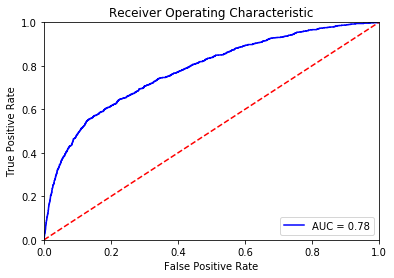

In [145]:
probs = grid_rf_class.best_estimator_.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')